In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ds = pd.read_csv("Retail_Transactions_Cleaned.csv")
ds.head()



,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Product_List,Num_Products,Avg_Price_Per_Item
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,No Promotion,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,23.883333
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",5,12.965000
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,No Promotion,['Spinach'],1,6.915000
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,No Promotion,"['Tissues', 'Mustard']",2,39.340000
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,['Dish Soap'],1,1.642000


In [ ]:
ds.describe()


,Transaction_ID,Total_Items,Total_Cost,Num_Products,Avg_Price_Per_Item
count,4.455480e+05,445548.000000,445548.000000,445548.000000,445548.000000
mean,1.000223e+09,5.491628,52.456594,3.001717,15.388350
std,1.286188e+05,2.871310,27.412071,1.413094,17.537590
min,1.000000e+09,1.000000,5.000000,1.000000,0.500000
25%,1.000111e+09,3.000000,28.780000,2.000000,5.237944
50%,1.000223e+09,5.000000,52.390000,3.000000,9.550000
75%,1.000334e+09,8.000000,76.150000,4.000000,17.535000
max,1.000446e+09,10.000000,100.000000,5.000000,100.000000


In [ ]:
ds['Payment_Method'].value_counts()
ds['Store_Type'].value_counts()
ds['City'].value_counts().head(10)


,count
City,
Dallas,44840
Boston,44810
Chicago,44728
Seattle,44633
Houston,44629
San Francisco,44562
Los Angeles,44436
Atlanta,44363
New York,44289


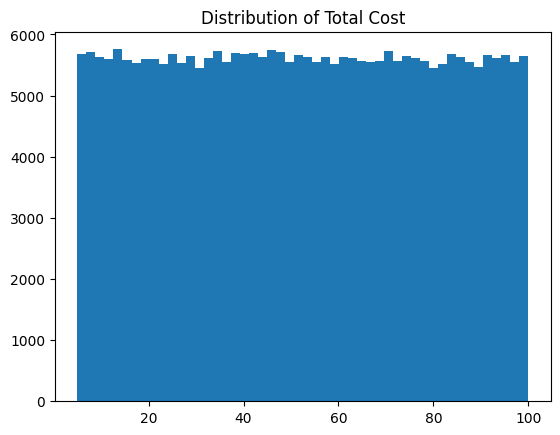

In [ ]:
plt.hist(df['Total_Cost'], bins=50)
plt.title("Distribution of Total Cost")
plt.show()


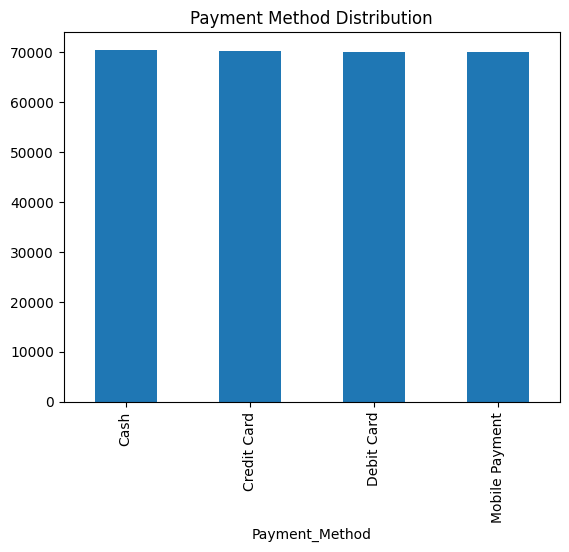

In [ ]:
df['Payment_Method'].value_counts().plot(kind='bar')
plt.title("Payment Method Distribution")
plt.show()


In [ ]:
import sqlite3

conn = sqlite3.connect("retail.db")
ds.to_sql("transactions", conn, if_exists="replace", index=False)


445548

In [ ]:
import sqlite3
import pandas as pd

# connect to database
conn = sqlite3.connect("retail.db")

# load cleaned data
ds = pd.read_csv("Retail_Transactions_Cleaned.csv")

# write table to SQL
ds.to_sql("transactions", conn, if_exists="replace", index=False)



445548

In [ ]:
query = """
SELECT City, SUM(Total_Cost) AS Total_Revenue
FROM transactions
GROUP BY City
ORDER BY Total_Revenue DESC
LIMIT 5;
"""

pd.read_sql_query(query, conn)


,City,Total_Revenue
0,Dallas,2359875.86
1,Chicago,2355513.44
2,San Francisco,2342884.44
3,Boston,2341623.62
4,Houston,2336881.33


In [ ]:
query = """
SELECT strftime('%Y-%m', Date) AS Month,
       SUM(Total_Cost) AS Revenue
FROM transactions
GROUP BY Month
ORDER BY Month;
"""

pd.read_sql_query(query, conn)


,Month,Revenue
0,2020-01,457094.70
1,2020-02,425609.91
2,2020-03,452438.03
3,2020-04,441857.51
4,2020-05,444597.49
5,2020-06,439458.85
6,2020-07,444884.51
7,2020-08,452162.43
8,2020-09,443737.09
9,2020-10,453410.43


In [ ]:
query = """
SELECT Promotion, SUM(Total_Cost) AS Revenue
FROM transactions
GROUP BY Promotion;
"""

pd.read_sql_query(query, conn)


,Promotion,Revenue
0,BOGO (Buy O,24.51
1,BOGO (Buy One Get One),7750780.82
2,Discount on Selected Items,7808261.17
3,No Promotion,7812864.13


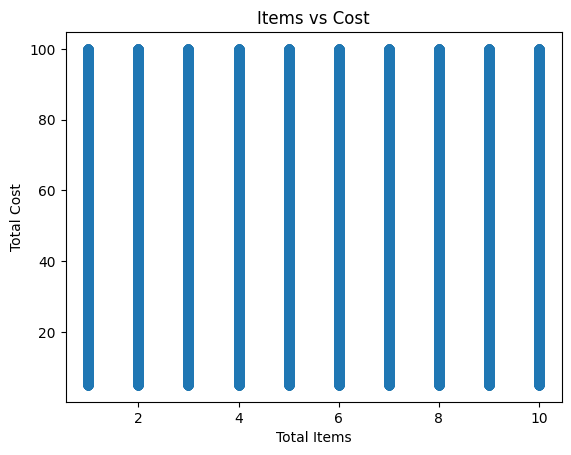

In [ ]:
plt.scatter(df['Total_Items'], df['Total_Cost'])
plt.xlabel("Total Items")
plt.ylabel("Total Cost")
plt.title("Items vs Cost")
plt.show()


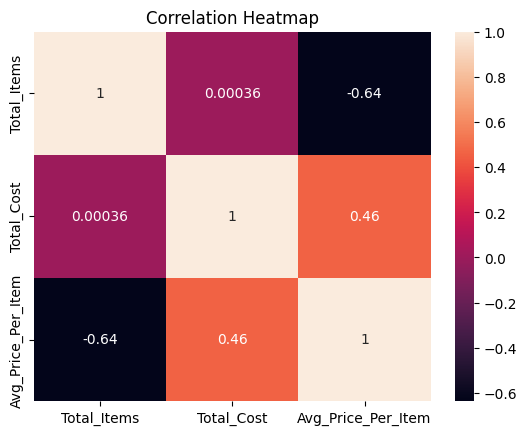

In [ ]:
corr = df[['Total_Items','Total_Cost','Avg_Price_Per_Item']].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


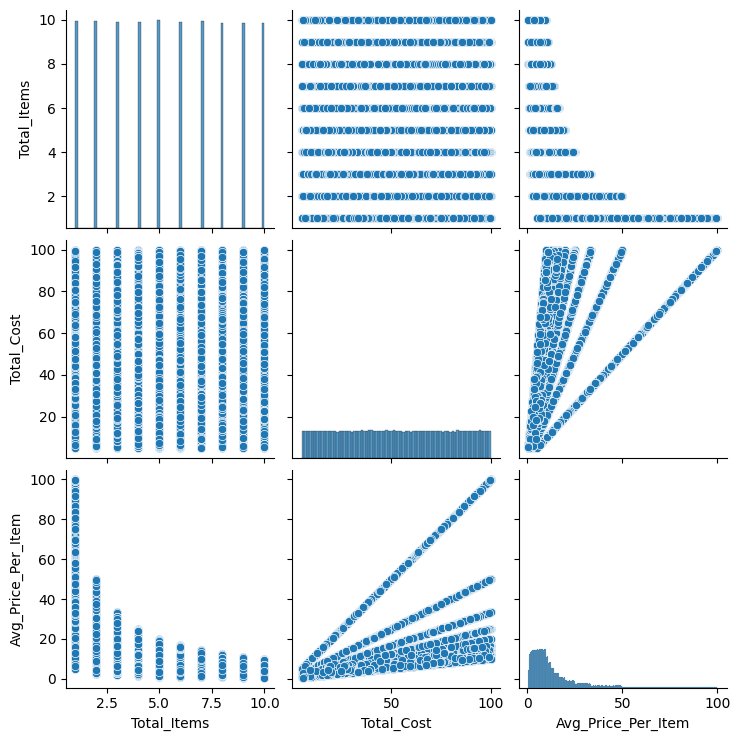

In [ ]:
sns.pairplot(df[['Total_Items','Total_Cost','Avg_Price_Per_Item']])
